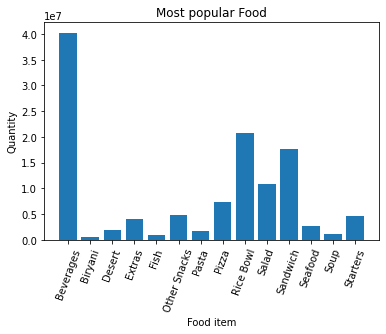

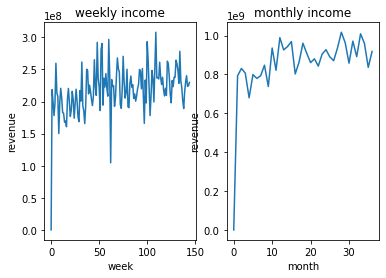

<Figure size 720x1440 with 0 Axes>

In [1]:
'''Note: 

* Before writing any code remember that this assigment is for helping you understand the basics of file
handling in csv file. 

* This project is designed to have a work flow such that everyone is in same page for this purpose the variables are
given a strict name which should not be changed or modified according to your convinience

* Few of new functions like .head() .xticks().... and concepts may have been introduced in the assingment, so we encourage you
all to go through them without skipping.

*  functions which are to be used in the Your code sections are globally available so try to look for those where you have been prompted
'''

'''Its the data of a meal delivery company which operates in multiple cities. 
They have various fulfillment centers in these cities for dispatching meal orders to their customers.
train.csv: Historical data of demand for a product-center combination 
fulfilment_center_info.csv: Information for fulfillment center like center area, city information etc.
meal_info.csv: Product(Meal) features such as category, sub-category, current price and discount'''


'''START CODE'''

#Import necessary libraries: Numpy,pandas,matplotlib

'''************************Your code here**********************'''
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

'''************************************************************'''


#read meal_info.csv file from provided dataset into a df_meal named variable
#Note: Proper file directory should be provided

'''************************Your code here**********************'''
src1 = r"C:\Users\user\Downloads\PROJECT_CODE_LEARN\python\SUMMER_MLIG\meal_info.csv"
df_meal = pd.read_csv(src1)

'''************************************************************'''


df_meal.head()
'''This is for displaying first five data points'''

#read fulfilment_center_info.csv file from provided dataset
#Note: Proper file directory should be provided

'''************************Your code here**********************'''
src2 = r"C:\Users\user\Downloads\PROJECT_CODE_LEARN\python\SUMMER_MLIG\fulfilment_center_info.csv"
df_center = pd.read_csv(src2)

'''************************************************************'''

df_center.head()
'''This is for displaying first five data points'''

#read train.csv file from provided dataset
#Note: Proper file directory should be provided

'''************************Your code here**********************'''
src3 = r"C:\Users\user\Downloads\PROJECT_CODE_LEARN\python\SUMMER_MLIG\train.csv"
df_food = pd.read_csv(src3)
#Added a week 0 row for correct rep and deleted week 145 as 145/4 is not integer

'''************************************************************'''

df_food.head()

'''Since the provided information is in different files, your work here is to merge them.Look for the functions
in pandas library to do so'''

'''************************Your code here**********************'''
df = pd.merge(df_food,
             df_meal[['meal_id','category']],
             on ='meal_id',
             how ='left')
df = pd.merge(df,
             df_center[['center_id','region_code']],
             on ='center_id',
             how ='left')


'''************************************************************'''

'''Here we have used pd.pivot_table() kindly go through the function and mention in comment what it does'''

table = pd.pivot_table(data=df,index='category',values='num_orders',aggfunc=np.sum)
#pivot_table in panda library is used to summarize large df table with a index and gives sum for particular values for that index


'''Graph tweaking
************************
Plot a bar graph with title 'Most popular food' for category(x-axis) vs number-of-orders(y-axis)

give x label 'Food items'
give y label 'Quantity sold'


'''

'''************Yourcode*********************'''

#bar graph

plt.bar(table.index,table['num_orders'])
plt.xticks(rotation=70)
plt.xlabel("Food item")
plt.ylabel("Quantity")
plt.title("Most popular Food")

plt.show()
#xticks 
#plt.xticks(rotation=70) used to label the x axis indices with fooditem column and rotate it by 70 degree

#x-axis labels 


#y-axis labels 


#plot title 


#save plot 


#display 


'''************************************************'''


'''Comparison of weekly and monthly sales
 Create a new column
* named 'revenue' where each element is product of checkout_price and num_orders 
** named 'month' by using ['week'] column (week column value divided by 4 gives month value)'''



'''**************************Your code******************************'''

revenue=[]
revenue = df["checkout_price"] * df["num_orders"]
df["revenue"]= revenue



'''******************************************************************'''
''''Here we have created two list week and week_order ,you need to store in them mapping the monthly orders'''    
#list to store week-wise revenue 
rtable = pd.pivot_table(data=df,index='week',values='revenue',aggfunc=np.sum)
week = rtable.index
week_order=rtable.values



'''***********************************Your code***********************'''


'''*********************************************************************'''
'''Here we have created two list month and month_order ,
store month number in month list and revenue of each month in month_order'''
#list to store month-wise revenue 


'''***********************************Your code***********************'''
month=[0]
for i in range(1,37):
    month.append(i)
    month.append(i)
    month.append(i)
    month.append(i)
    
rtable['month'] = month
rtable2 = pd.pivot_table(data=rtable,index='month',values='revenue',aggfunc=np.sum)
month = rtable2.index
month_order=rtable2.values





    
'''*********************************************************************'''
''' Plot two subplots in the same space : one for weekly revenue and other for monthly revenue.
For weekly : Title(Weekly income),x_label(week),y_label(revenue); similarly for monthly revenue.
'''

'''************Yourcode*********************'''
plt.subplot(121)
plt.plot(week,week_order)
plt.xlabel("week")
plt.ylabel("revenue")
plt.title("weekly income")
plt.subplot(122)
plt.plot(month,month_order)
plt.xlabel("month")
plt.ylabel("revenue")
plt.title("monthly income")
plt.figure(figsize=(10,20))
plt.show()

